<h2 style="text-align:left;color:#0984e3">Importer les packages pour l’implémentation de l’ACP :</h2><br/>

In [90]:
# pandas : panel data , pour une facile manipulation des données.
import pandas as pd 

# numpy : numerical python extensions , pour la manipulation de tableaux et les opérations mathématiques.
import numpy as np

# decomposition : Package pour l'analyse en composantes principales de scikit learn.
from sklearn.decomposition import PCA

# preprocessing : package pour centrer et normaliser les données avant d'effectuer l'ACP.
from sklearn.preprocessing import StandardScaler

# matplotlib : pour dessiner des graphiques, des tracés ...
import matplotlib.pyplot as plt

<h2 style="text-align:left;color:#0984e3">Chargement des données :</h2><br/>

In [91]:
data_frame = pd.read_csv("nndb_flat1.csv",sep = ',')

#Affihcer les colonnes pour chaque data type :
print(data_frame.columns.to_series().groupby(data_frame.dtypes).groups)
# Afficher les dimensions de la dataframe
data_frame.shape

{int64: ['ID'], float64: ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA'], object: ['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName']}


(8618, 45)

In [92]:
# Afficher les 3 premières lignes à l'aide de la fonction head()
data_frame.head(3)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909


In [93]:
# Afficher les 3 dernières lignes à l'aide de la fonction tail()
data_frame.tail(3)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.0,0.0,...,0.0000,0.00625,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.1,1.4,...,0.0150,0.08750,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909
8617,93600,Finfish and Shellfish Products,"TURTLE,GREEN,RAW","Turtle, green, raw",NaN,NaN,NaN,89.0,19.8,0.5,...,0.0375,0.06875,0.115385,0.100000,0.098333,0.000278,0.047619,0.257143,0.305455,0.090909


In [94]:
# l'index pour les données , inplace(True): modifie l'objet origine de DataFrame sans créer une copie.

data_frame.set_index('ID', inplace=True)

#séparer les variables non numériques pour les ajouter à la fin
data_frame_labels = data_frame.loc[:, :'ScientificName']
#On doit supprimer les six premières colonnes pour faire les calculs
#On utilise la méthode 'drop' au lieu de 'del'(une seule colonne)
data_frame.drop(data_frame.iloc[:, :6], axis='columns', inplace = True)

In [95]:
data_frame

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273


In [96]:
# centrer et réduire les variables sur lesquelles nous allons procéder à une ACP

data_normalise = StandardScaler().fit_transform(data_frame)

# Moyenne et Variance

print(f"Moyenne ={np.round(data_normalise.mean(),2)} Variance ={np.round(data_normalise.std(),2)}")


Moyenne =0.0 Variance =1.0


In [97]:
pca_nutrition = PCA(n_components = 7)
PC_nutrition = pca_nutrition.fit_transform(data_normalise)

In [98]:
#La quantité de variance expliquée par chacun des composants sélectionnés
print(pca_nutrition.explained_variance_)
print (pca_nutrition.explained_variance_ratio_[:7].sum())

[9.86980843 4.11519521 3.42762171 2.93274939 2.38162102 2.09360414
 1.74276718]
0.6989548627279027


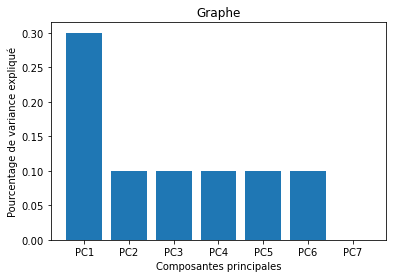

In [99]:
# 'explained_variance_ratio_' : Pourcentage de variance expliqué par chacune des composantes sélectionnées
per_var = np.round(pca_nutrition.explained_variance_ratio_,decimals=1)

# création des étiquettes pour les composantes principales
labels = ['PC' + str(x) for x in range( 1 , len(per_var) +1 ) ]

# création du graphe
plt.bar( x=range( 1,len(per_var)+1 ), height=per_var, tick_label=labels)
plt.ylabel('Pourcentage de variance expliqué')
plt.xlabel('Composantes principales')
plt.title('Graphe')
plt.show()


In [100]:
#On crée une DataFrame contenant les valeurs des composants principaux
PC_nutrition = pd.DataFrame(PC_nutrition[:, :7], index=data_frame.index)
#On concatène les labels avec la nouvelle dataframe
PC_nutrition = pd.concat([data_frame_labels,PC_nutrition])
#On supprime les 3 colonnes suivantes car elles ne sont pas significatives
PC_nutrition.drop(['CommonName','MfgName','ScientificName'], axis='columns', inplace=True)
PC_nutrition.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5',5:'c6',6:'c7'}, inplace=True)

In [101]:
#Les 7 vecteurs sont orthogonaux
np.round(PC_nutrition.corr(), 7)

,c1,c2,c3,c4,c5,c6,c7
c1,1.0,0.0,0.0,-0.0,0.0,0.0,0.0
c2,0.0,1.0,0.0,0.0,0.0,0.0,-0.0
c3,0.0,0.0,1.0,-0.0,0.0,-0.0,0.0
c4,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0
c5,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0
c6,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0
c7,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0


In [102]:
vects = pca_nutrition.components_[:7]

# pd.Series : Tableau unidimensionnel avec des étiquettes d'axe
un = pd.Series(vects[0], index=data_frame.columns)
un.sort_values(ascending=False)

Riboflavin_mg       0.262413
Riboflavin_USRDA    0.262413
Niacin_USRDA        0.258820
Niacin_mg           0.258820
VitB6_USRDA         0.240479
VitB6_mg            0.240479
Folate_USRDA        0.212663
Folate_mcg          0.212663
Iron_mg             0.207546
Thiamin_USRDA       0.204840
Thiamin_mg          0.204840
Zinc_USRDA          0.187761
Zinc_mg             0.187761
Magnesium_mg        0.166961
Magnesium_USRDA     0.166961
Phosphorus_mg       0.147768
Phosphorus_USRDA    0.147768
VitB12_mcg          0.147756
VitB12_USRDA        0.147756
Copper_mcg          0.140444
Copper_USRDA        0.140444
Calcium_USRDA       0.118434
Calcium_mg          0.118434
Fiber_g             0.112393
Protein_g           0.110906
VitA_mcg            0.109097
VitA_USRDA          0.109097
VitE_mg             0.099086
VitE_USRDA          0.099086
Carb_g              0.098943
Energy_kcal         0.093260
Selenium_mcg        0.075559
Selenium_USRDA      0.075559
VitC_USRDA          0.070302
VitC_mg       

In [103]:
deux = pd.Series(vects[1], index=data_frame.columns)
deux.sort_values(ascending=False)

VitB12_USRDA        0.359418
VitB12_mcg          0.359418
VitA_USRDA          0.338186
VitA_mcg            0.338186
Copper_USRDA        0.306493
Copper_mcg          0.306493
Selenium_mcg        0.134056
Selenium_USRDA      0.134056
Manganese_mg        0.125262
Protein_g           0.121815
Zinc_USRDA          0.048167
Zinc_mg             0.048167
Riboflavin_mg       0.013584
Riboflavin_USRDA    0.013584
Phosphorus_mg       0.001312
Phosphorus_USRDA    0.001312
Fat_g              -0.017773
VitC_mg            -0.051780
VitC_USRDA         -0.051780
Niacin_mg          -0.058533
Niacin_USRDA       -0.058533
VitE_USRDA         -0.077774
VitE_mg            -0.077774
VitB6_USRDA        -0.083039
VitB6_mg           -0.083039
Magnesium_mg       -0.089098
Magnesium_USRDA    -0.089098
Iron_mg            -0.100662
Calcium_mg         -0.105687
Calcium_USRDA      -0.105687
Energy_kcal        -0.107177
Folate_USRDA       -0.131008
Folate_mcg         -0.131008
Sugar_g            -0.136631
Thiamin_USRDA 

In [104]:
trois = pd.Series(vects[2], index=data_frame.columns)
trois.sort_values(ascending=False)

Phosphorus_mg       0.364681
Phosphorus_USRDA    0.364681
Calcium_USRDA       0.299016
Calcium_mg          0.299016
Magnesium_mg        0.283301
Magnesium_USRDA     0.283301
Protein_g           0.149088
Energy_kcal         0.145456
Fiber_g             0.138097
Fat_g               0.136411
Selenium_mcg        0.120336
Selenium_USRDA      0.120336
Copper_mcg          0.102706
Copper_USRDA        0.102706
VitE_USRDA          0.048507
VitE_mg             0.048507
Manganese_mg        0.035239
Zinc_mg             0.034201
Zinc_USRDA          0.034201
Iron_mg             0.014597
Carb_g              0.009066
Sugar_g            -0.037834
VitA_USRDA         -0.063981
VitA_mcg           -0.063981
VitB12_mcg         -0.066187
VitB12_USRDA       -0.066187
VitC_mg            -0.086171
VitC_USRDA         -0.086171
VitB6_USRDA        -0.123031
VitB6_mg           -0.123031
Thiamin_mg         -0.144477
Thiamin_USRDA      -0.144477
Niacin_mg          -0.146047
Niacin_USRDA       -0.146047
Riboflavin_USR

In [105]:
quatre = pd.Series(vects[3], index=data_frame.columns)
quatre.sort_values(ascending=False)

Protein_g           0.346195
Selenium_mcg        0.302322
Selenium_USRDA      0.302322
Zinc_USRDA          0.212857
Zinc_mg             0.212857
Niacin_mg           0.144883
Niacin_USRDA        0.144883
Phosphorus_USRDA    0.106199
Phosphorus_mg       0.106199
VitB6_mg            0.067571
VitB6_USRDA         0.067571
Thiamin_mg          0.030983
Thiamin_USRDA       0.030983
Riboflavin_USRDA   -0.001097
Riboflavin_mg      -0.001097
Folate_USRDA       -0.027825
Folate_mcg         -0.027825
VitB12_USRDA       -0.029742
VitB12_mcg         -0.029742
Iron_mg            -0.039161
Fat_g              -0.076799
Calcium_USRDA      -0.082468
Calcium_mg         -0.082468
Magnesium_USRDA    -0.095394
Magnesium_mg       -0.095394
VitE_USRDA         -0.118696
VitE_mg            -0.118696
VitC_USRDA         -0.118716
VitC_mg            -0.118716
Manganese_mg       -0.143345
Energy_kcal        -0.149723
Copper_mcg         -0.193598
Copper_USRDA       -0.193598
Fiber_g            -0.205851
VitA_USRDA    

In [106]:
cinq = pd.Series(vects[4], index=data_frame.columns)
cinq.sort_values(ascending=False)

Fat_g               0.439530
VitE_mg             0.429961
VitE_USRDA          0.429961
Energy_kcal         0.368896
Zinc_mg             0.099901
Zinc_USRDA          0.099901
Selenium_mcg        0.091098
Selenium_USRDA      0.091098
Protein_g           0.034322
Sugar_g             0.016995
VitB12_mcg          0.013957
VitB12_USRDA        0.013957
Manganese_mg        0.011451
Copper_mcg          0.010007
Copper_USRDA        0.010007
VitB6_USRDA         0.009702
VitB6_mg            0.009702
Folate_USRDA        0.004007
Folate_mcg          0.004007
Niacin_mg           0.001345
Niacin_USRDA        0.001345
Magnesium_USRDA    -0.009700
Magnesium_mg       -0.009700
Carb_g             -0.013864
Thiamin_mg         -0.017354
Thiamin_USRDA      -0.017354
Fiber_g            -0.025930
VitA_mcg           -0.036221
VitA_USRDA         -0.036221
Iron_mg            -0.046482
Riboflavin_USRDA   -0.067294
Riboflavin_mg      -0.067294
Phosphorus_USRDA   -0.141641
Phosphorus_mg      -0.141641
VitC_mg       

In [107]:
six = pd.Series(vects[5], index=data_frame.columns)
six.sort_values(ascending=False)

VitC_mg             0.535382
VitC_USRDA          0.535382
VitE_mg             0.257393
VitE_USRDA          0.257393
VitB6_USRDA         0.164362
VitB6_mg            0.164362
Fat_g               0.074771
Calcium_mg          0.050290
Calcium_USRDA       0.050290
Niacin_USRDA        0.047692
Niacin_mg           0.047692
Protein_g           0.032847
VitA_USRDA          0.020951
VitA_mcg            0.020951
Zinc_mg             0.019108
Zinc_USRDA          0.019108
Selenium_USRDA      0.013658
Selenium_mcg        0.013658
Manganese_mg        0.008062
Phosphorus_USRDA    0.000184
Phosphorus_mg       0.000184
VitB12_USRDA       -0.018925
VitB12_mcg         -0.018925
Magnesium_mg       -0.020477
Magnesium_USRDA    -0.020477
Riboflavin_mg      -0.029313
Riboflavin_USRDA   -0.029313
Energy_kcal        -0.057626
Fiber_g            -0.082351
Copper_USRDA       -0.089515
Copper_mcg         -0.089515
Iron_mg            -0.092337
Sugar_g            -0.109592
Folate_USRDA       -0.154717
Folate_mcg    

In [108]:
sept = pd.Series(vects[6], index=data_frame.columns)
sept.sort_values(ascending=False)

Calcium_mg          0.342808
Calcium_USRDA       0.342808
Phosphorus_mg       0.196213
Phosphorus_USRDA    0.196213
Fat_g               0.176088
Riboflavin_mg       0.109616
Riboflavin_USRDA    0.109616
VitE_mg             0.107336
VitE_USRDA          0.107336
Energy_kcal         0.103211
VitB12_mcg          0.099913
VitB12_USRDA        0.099913
VitA_USRDA          0.086310
VitA_mcg            0.086310
Sugar_g             0.066819
Thiamin_USRDA       0.052167
Thiamin_mg          0.052167
Niacin_mg           0.024466
Niacin_USRDA        0.024466
Folate_mcg         -0.000030
Folate_USRDA       -0.000030
Manganese_mg       -0.011296
Protein_g          -0.028087
VitB6_mg           -0.031074
VitB6_USRDA        -0.031074
Iron_mg            -0.046881
Zinc_mg            -0.067889
Zinc_USRDA         -0.067889
Carb_g             -0.084386
VitC_USRDA         -0.129628
VitC_mg            -0.129628
Selenium_mcg       -0.157611
Selenium_USRDA     -0.157611
Copper_USRDA       -0.169468
Copper_mcg    